In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from data_prep import labels_list_to_dict
from data_prep import label_mapping_dict
import time
labels_list_logfile = '/mnt/staff/rtjoa/shifts/RNN-shifts/labels.txt'
labels_map = labels_list_to_dict(labels_list_logfile)
map_abbrev = label_mapping_dict("labelsToAbbrev.txt")

data = genfromtxt('/users/facsupport/asharma/Data/Preprocessed/0.csv',delimiter=',')
print(data.shape)

(9106, 183)


In [30]:
print(data[50][0:90])
print()
print(data[50][90:180])
print()
print(data[50][180:183])

[ 0.    8.9   8.48  8.2   0.    2.08  8.35 12.9   7.33  8.72  0.    6.67
  8.81 13.83  7.95  7.99  7.45  0.    0.    0.   15.21 11.27 14.9   0.
  0.    2.2  13.86  7.62 15.97  8.37  6.77  2.27  8.13  2.03  9.74 15.63
  6.51  0.    2.93  9.06  8.85  7.98  9.    5.58  6.69  2.13  6.25  2.13
 13.38 11.1  14.67  4.52  7.37  2.3   9.2   9.07  6.55  2.18 11.9   6.62
 10.47  5.9   8.25  8.01  8.76  7.29  8.09  8.53  8.32  7.73  6.86  2.03
  6.87  2.05  7.75  3.9  15.66  7.74  6.45  0.    8.72  9.26  0.    0.
  1.85 12.25  6.64  4.43  7.39  1.88]

[ 95.42 102.92  90.49  81.47  96.5   79.15  77.43  99.94 102.84 101.63
  94.82  84.69  83.49  81.97 101.12 100.34  96.83  95.54  97.86  72.96
  75.65 100.4   79.41  99.81  98.54  89.64  83.36  83.86  82.46  94.98
 101.94 107.26 104.67  85.35  73.2   98.57 101.41  94.65  87.03  86.33
  69.83  79.68 100.02  93.8   90.65  95.66  90.55  69.88  72.03  85.95
 104.52 100.81  90.14  94.38  96.55  83.27  85.58 100.55  96.91  98.98
  83.2   75.73  75.47  82.42

In [31]:
#Sort entries by job id
data[data[:, 180].argsort()]

array([[ 0.  ,  8.  ,  8.  , ...,  1.  , 25.  ,  2.  ],
       [ 0.  ,  7.98,  7.7 , ...,  1.  , 50.  ,  3.  ],
       [ 0.  ,  0.  ,  0.  , ...,  1.  , 52.  ,  2.  ],
       ...,
       [ 0.  ,  7.58,  8.16, ..., 39.  ,  7.  ,  3.  ],
       [ 0.  ,  8.04,  8.01, ..., 39.  , 11.  ,  3.  ],
       [ 0.  ,  6.69,  8.01, ..., 39.  , 48.  ,  3.  ]])

34
Physical Therapy Assistant


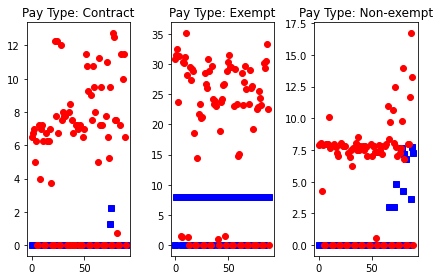

Other Service Worker


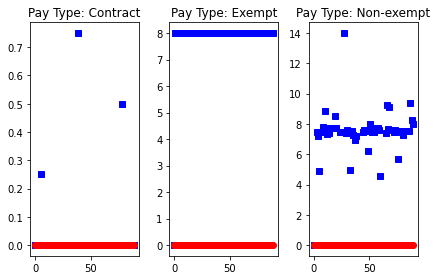

Housekeeping Service Worker


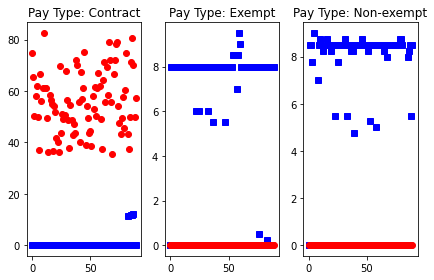

Certified Nurse Aide


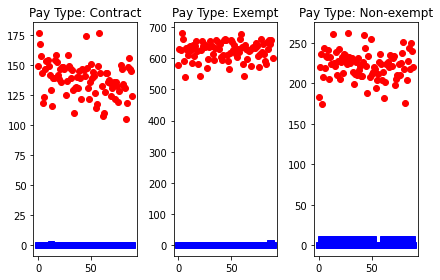

Registered Nurse with Administrative Duties


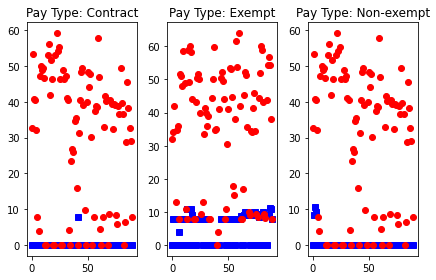

Licensed Practical/Vocational Nurse


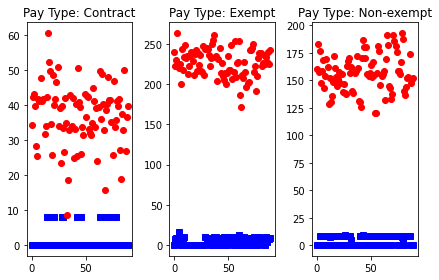

Registered Nurse


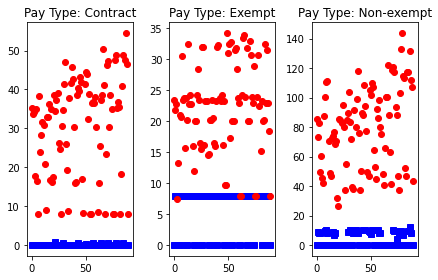

Other Activities Staff


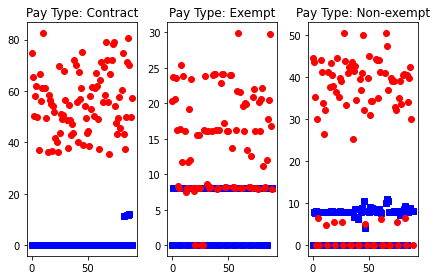

Physical Therapist


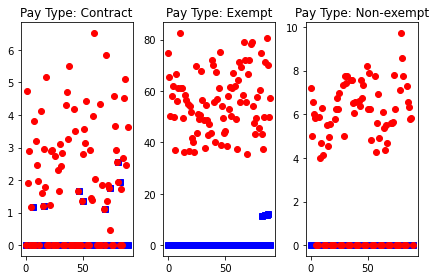

Licensed Practical/Vocational Nurse with Administrative Duties


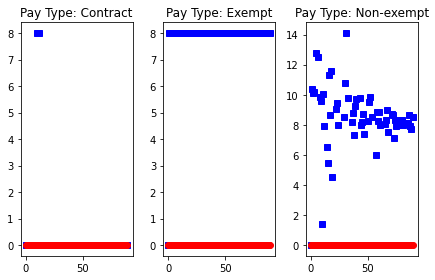

Speech/Language Pathologist


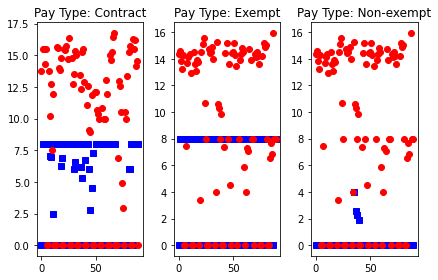

Registered Nurse Director of Nursing


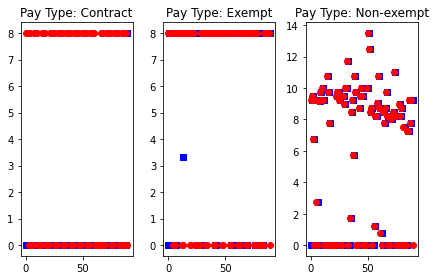

Medical Director


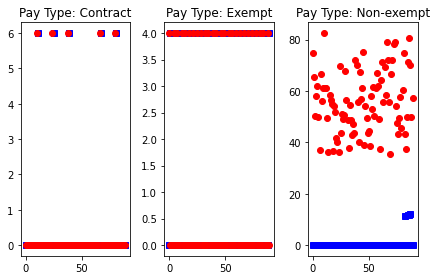

Occupational Therapy Assistant


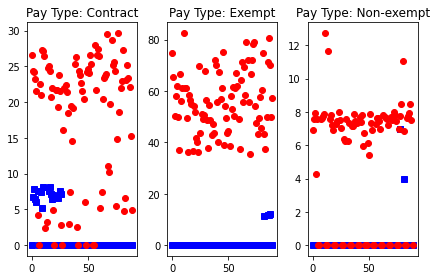

Occupational Therapist


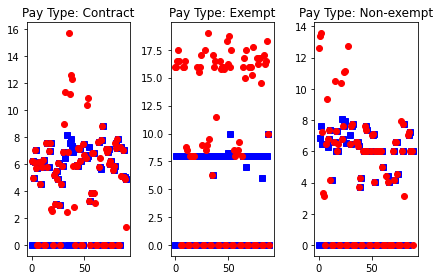

Dietitian


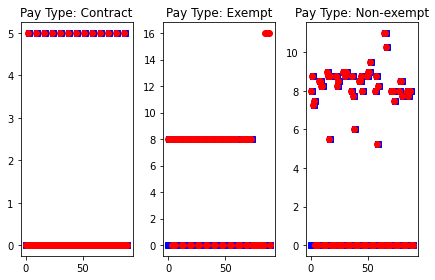

Qualified Social Worker


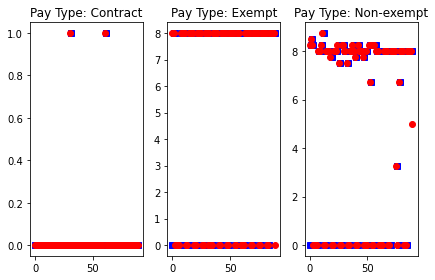

Administrator


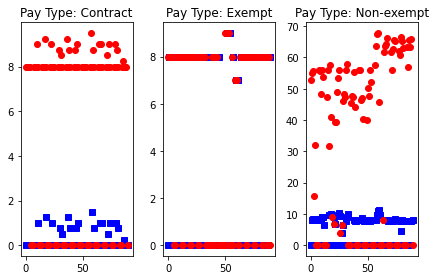

Therapeutic Recreation Specialist


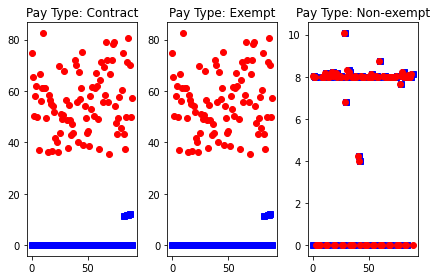

Other Physician


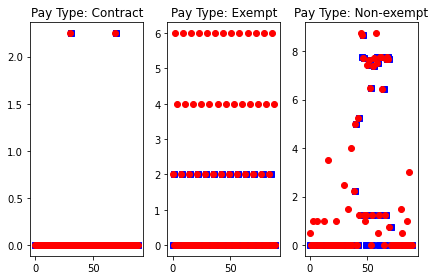

Other Social Worker


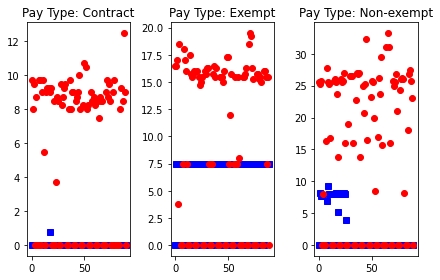

Pharmacist


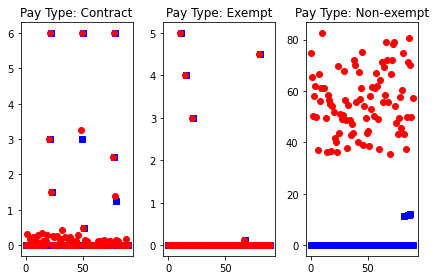

Qualified Activities Professional


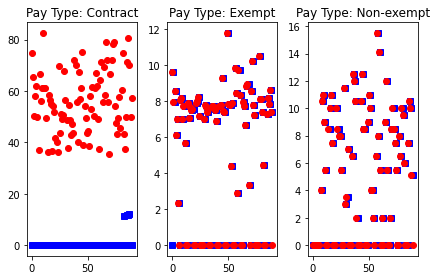

Physical Therapy Aide


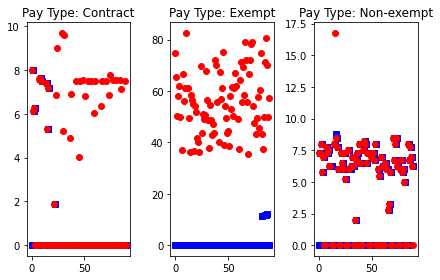

Nurse Practitioner


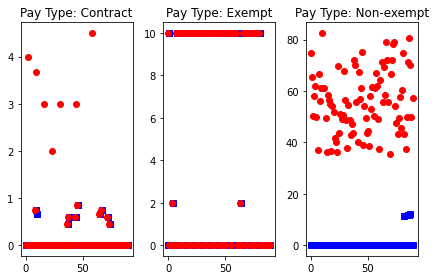

Nurse Aide in Training


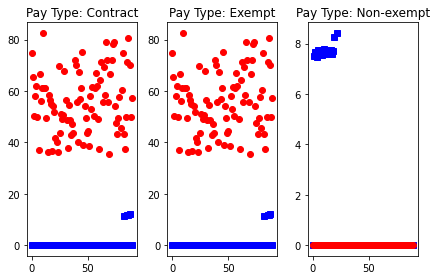

Feeding Assistant


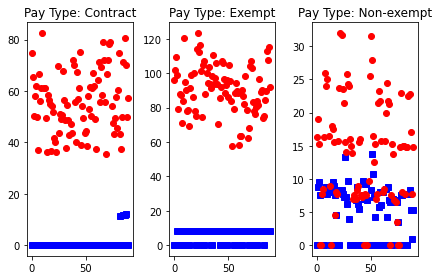

Clinical Nurse Specialist


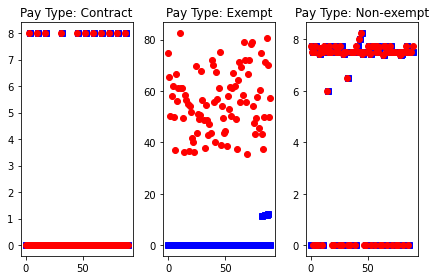

Mental Health Service Worker


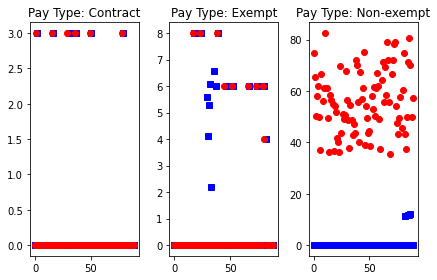

Occupational Therapy Aide


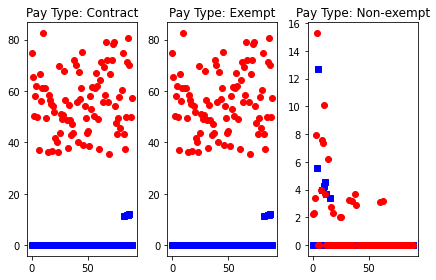

Podiatrist


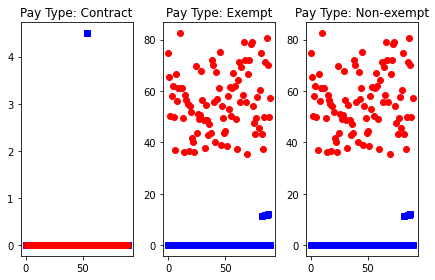

Respiratory Therapist


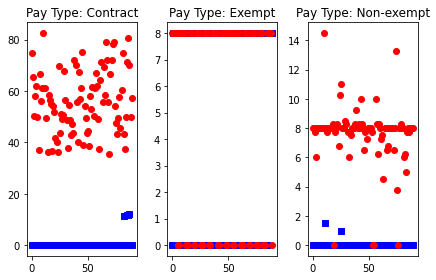

Respiratory Therapy Technician


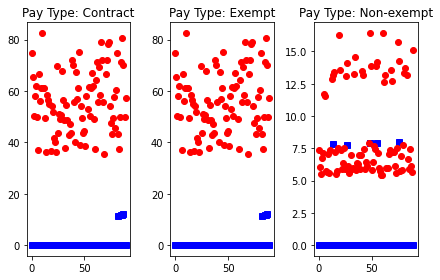

Clinical Laboratory Service Worker


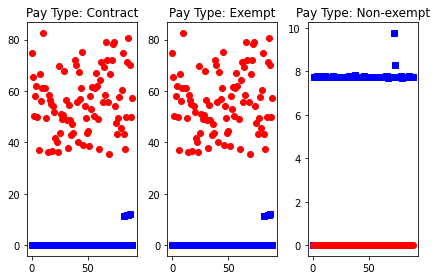

In [36]:
set = {}
count = 0
index = -1
for entry in data:
    index += 1
    job = labels_map['job_title_label'][entry[180]]
    payType = int(entry[182])-1
    
    if job not in set:
        set[job] = [-1,-1,-1]
    if set[job][payType] != -1:
        continue
    set[job][payType] = index
    
    
print(len([*set]))    

    
#### TODO: Print 3 different subplots for each job type with diff pay types  
for job in [*set]:
    for i in range(3):
        entry = data[set[job][i]]
        
        plt.subplot(1,3,i+1)
        plt.plot(entry[0:90],'bs')
        plt.plot(entry[90:180],'ro')
        plt.title("Pay Type: "+labels_map['pay_type_label'][i+1])
    
    print(job)
    plt.tight_layout()
    plt.show()
    

In [11]:
print(labels_map['pay_type_label'])


{1: 'Contract', 2: 'Exempt', 3: 'Non-exempt'}
